Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
Image Path: /content/scene_image.png


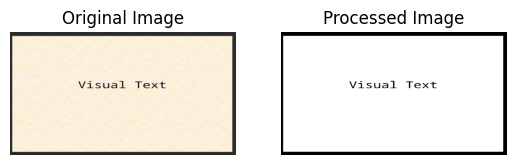

Visual Text


In [3]:


import cv2
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt

# Function to extract text from a scene with enhanced preprocessing
def extract_text_from_scene(image_path):
    try:
        # Print the image path for debugging
        print(f"Image Path: {image_path}")

        # Read the image using OpenCV
        img = cv2.imread(image_path)

        # Check if the image is loaded successfully
        if img is None:
            raise Exception("Error: Unable to load the image. Check if the file exists and is a valid image.")

        # Display the original image
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        # Convert the image to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply adaptive thresholding to enhance text visibility
        _, thresholded_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Display the processed image
        plt.subplot(1, 2, 2)
        plt.imshow(thresholded_img, cmap='gray')
        plt.title('Processed Image')
        plt.axis('off')

        plt.show()

        # Use Tesseract to extract text from the processed image
        extracted_text = pytesseract.image_to_string(
            Image.fromarray(thresholded_img),
            lang='eng',  # Specify language (adjust as needed)
            config='--psm 6'  # Adjust OCR configuration (try different values)
        )

        return extracted_text.strip()  # Remove leading/trailing whitespaces
    except Exception as e:
        return str(e)

# Example usage
scene_image_path = '/home/austine/Downloads/WhatsApp Image 2024-04-16 at 5.30.32 PM.jpeg'
result = extract_text_from_scene(scene_image_path)

# Print the extracted text or error message
print(result)
